### Max Pooling layer
In this network, we add and visualize the output of a maxpooling layer in cnn
A convolutional layer + activation function, followed by a pooling layer and alinear layer make up the basic layers of CNN

--- > Input image --> Convolutional Layer + activation --> Pooling layer ---> FCL  

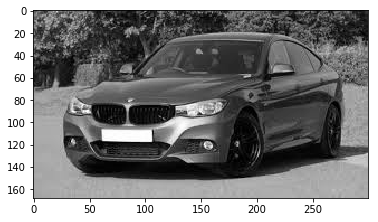

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim
%matplotlib inline

# defining the path of the image
img_path = 'images/car.png'

# load the image
bgr_img = cv2.imread(img_path)

# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize the image
gray_img = gray_img.astype("float32")/255

# plot the image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [6]:
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('Filter shape: ', filter_vals.shape)

Filter shape:  (4, 4)


In [7]:
## defining four different filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_2.T
filter_4 = -filter_3

filters = np.array([filter_1, filter_2, filter_3, filter_4])
print(filters[0])

[[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


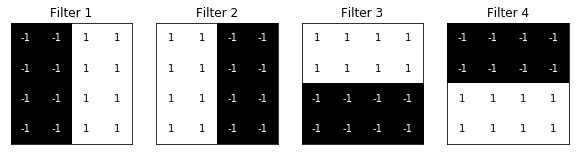

In [8]:
# visualize all four filters
fig = plt.figure(figsize=(10,5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap = 'gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='white' if filters[i][x][y] < 0 else 'black')

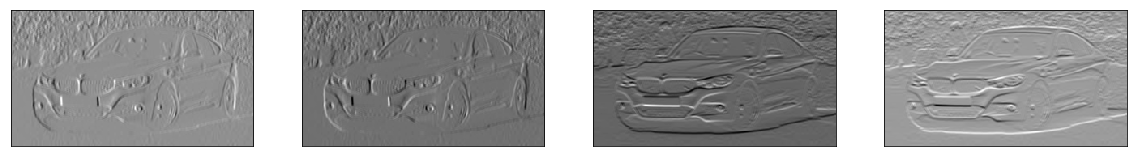

In [9]:
## apply the above the filters to the image and display
fig = plt.figure(figsize=(20,10))
for i in range(4):
    image = cv2.filter2D(gray_img,-1, filters[i])
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(image, cmap='gray')
    


In [20]:
## define the network
import torch
import torch.nn as nn
import torch.nn.functional as F

## defining a neural network with a convolutional layer with four filters
## and a pooling layer of size(2,2)

class Net(nn.Module):
    def __init__(self, weight):
        super(Net, self).__init__()
        # initialize the weights of the convolutional layer to be the weights
        # of 4 defined filters
        k_height, k_width = weight.shape[2:]
        self.conv = nn.Conv2d(1,4, kernel_size=(k_height, k_width),bias = False)
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(2,2)
    
    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre and post activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        pooled_x = self.pool(activated_x)
        
        # return all layers
        return conv_x, activated_x, pooled_x

weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)

model = Net(weight)

print(model)
    
    

4
Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


### Visualize the output of each filter
first, we'll define a helper function vizlayer that takes in a specific layer and number of filters, and displays the output of that layer once an image has been passed through


In [11]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1)
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

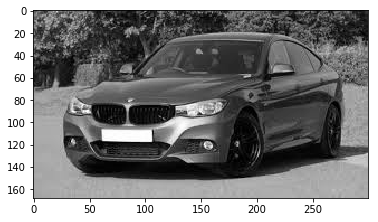

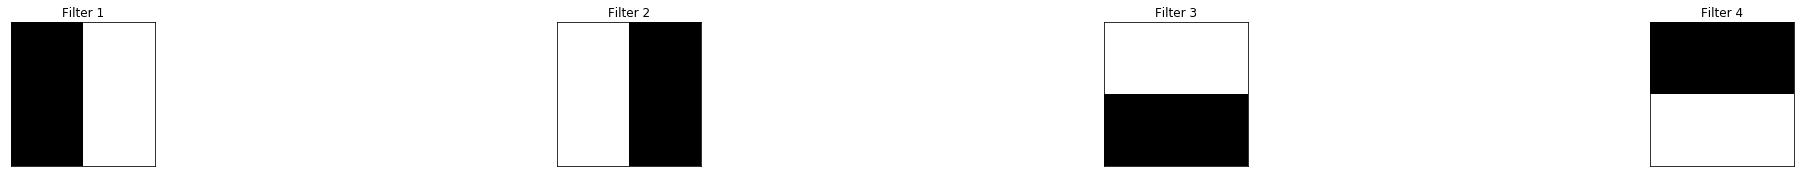

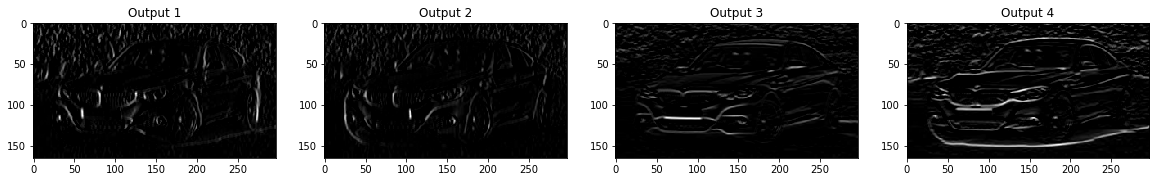

In [13]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

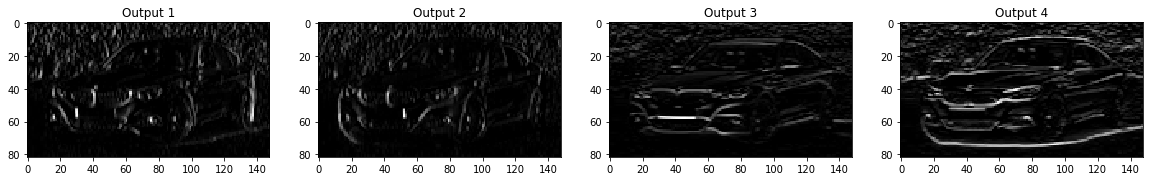

In [14]:
viz_layer(pooled_layer)